https://www.madopro.net/entry/bitcoin_chart#%E3%83%AD%E3%83%BC%E3%82%BD%E3%82%AF%E8%B6%B3%E3%83%81%E3%83%A3%E3%83%BC%E3%83%88%E3%82%92%E6%8F%8F%E3%81%84%E3%81%A6%E3%81%BF%E3%82%8B

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import pprint
import time
from time import sleep
import pybitflyer
import datetime
import requests
import json
from datetime import datetime
from datetime import datetime, timezone, timedelta
   
def main():
    df = pd.read_csv('token.csv')
    api = pybitflyer.API(api_key=df['api_key'][0], api_secret=df['api_secret'][0])
    print("start")
    ids,sides,prices,sizes,exec_dates,result =  [[] for i in range(6)] 
    # メイン
#     last_id = 387899942
#     data = api.executions(product_code="FX_BTC_JPY",count=500,before=last_id)
    data = api.executions(product_code="FX_BTC_JPY",count=500)
    count = 0
    while count < 10:
        while True:
            try:
                id_d = [d['id'] for d in data]
                ids.extend(id_d)
                
                side = [d['side'] for d in data]
                sides.extend(side)
                
                price = [d['price'] for d in data]
                prices.extend(price)
        
                size = [d['size'] for d in data]
                sizes.extend(size)
        
                exec_date = [d['exec_date'] for d in data]
                exec_dates.extend(exec_date)
                
                last_id = data[-1]['id']
                
                time.sleep(0.33)
                data = api.executions(product_code="FX_BTC_JPY",count=500,before=last_id)
                print(count,last_id)
                break
            except:
                continue
        count = count + 1
    
    df = pd.DataFrame({'id':ids,'side':sides,'price':prices,'size':sizes,'exec_date':exec_dates})
    df['exec_date'] = pd.to_datetime(df['exec_date']) + timedelta(hours=9)
    now = datetime.now()
    df.to_csv("testdata.csv", index=False)
    print(df)
    
if __name__ == '__main__':
    main()

start
0 401958665
1 401958144
2 401957626
3 401957114
4 401956602
5 401956092
6 401955580
7 401955071
8 401954550
9 401954024
                   exec_date         id     price  side      size
0    2018-09-03 06:01:43.040  401959176  820505.0   BUY  0.010000
1    2018-09-03 06:01:42.977  401959175  820505.0   BUY  0.577000
2    2018-09-03 06:01:42.977  401959174  820502.0   BUY  0.010000
3    2018-09-03 06:01:42.977  401959173  820496.0   BUY  0.413000
4    2018-09-03 06:01:42.740  401959172  820505.0   BUY  0.030000
5    2018-09-03 06:01:42.740  401959171  820498.0   BUY  0.010000
6    2018-09-03 06:01:42.553  401959170  820505.0   BUY  0.553934
7    2018-09-03 06:01:42.553  401959169  820500.0   BUY  0.436066
8    2018-09-03 06:01:42.553  401959168  820498.0   BUY  0.010000
9    2018-09-03 06:01:42.163  401959167  820500.0   BUY  1.000000
10   2018-09-03 06:01:42.070  401959166  820487.0  SELL  0.010000
11   2018-09-03 06:01:41.757  401959165  820500.0   BUY  0.645782
12   2018-09-03 

In [32]:
import pandas as pd
import numpy as np
import pprint
import time
from time import sleep
import pybitflyer
import datetime
import requests
import json
from datetime import datetime
   
def main():
    df = pd.read_csv('testdata.csv')
    df.exec_date = pd.to_datetime(df.exec_date,format='%Y/%m/%dT%H:%M:%S.%f')
    df['exec_date'] = df['exec_date'].map(lambda x: x.replace(second=x.second//1*1,microsecond=0))
    summary = df[['exec_date', 'price']].groupby(['exec_date']).min().rename(columns={'price': 'low'})
    summary = summary.merge(
        df[['exec_date', 'price']].groupby(['exec_date']).max().rename(columns={'price': 'high'}),
        left_index=True, right_index=True)
    summary = summary.merge(
        df[['exec_date', 'price']].groupby(['exec_date']).last().rename(columns={'price': 'open'}),
        left_index=True, right_index=True)
    summary = summary.merge(
        df[['exec_date', 'price']].groupby(['exec_date']).first().rename(columns={'price': 'close'}),
        left_index=True, right_index=True)
    summary = summary.merge(
        df[['exec_date', 'size']].groupby(['exec_date']).sum(),
        left_index=True, right_index=True)
    print(summary.head())
    summary.to_csv("summary.csv", index=False,header=False)
    
if __name__ == '__main__':
    main()

                          low      high      open     close      size
exec_date                                                            
2018-09-03 05:57:49  820182.0  820260.0  820196.0  820213.0  0.784168
2018-09-03 05:57:50  820214.0  820258.0  820214.0  820258.0  0.050000
2018-09-03 05:57:51  820243.0  820265.0  820258.0  820244.0  0.778235
2018-09-03 05:57:52  820235.0  820316.0  820246.0  820288.0  0.830000
2018-09-03 05:57:53  820172.0  820287.0  820279.0  820287.0  1.118411


In [55]:
data = np.loadtxt('summary.csv', delimiter=',')


BUY: 781677.845494939
SELL: 781667.0257086646


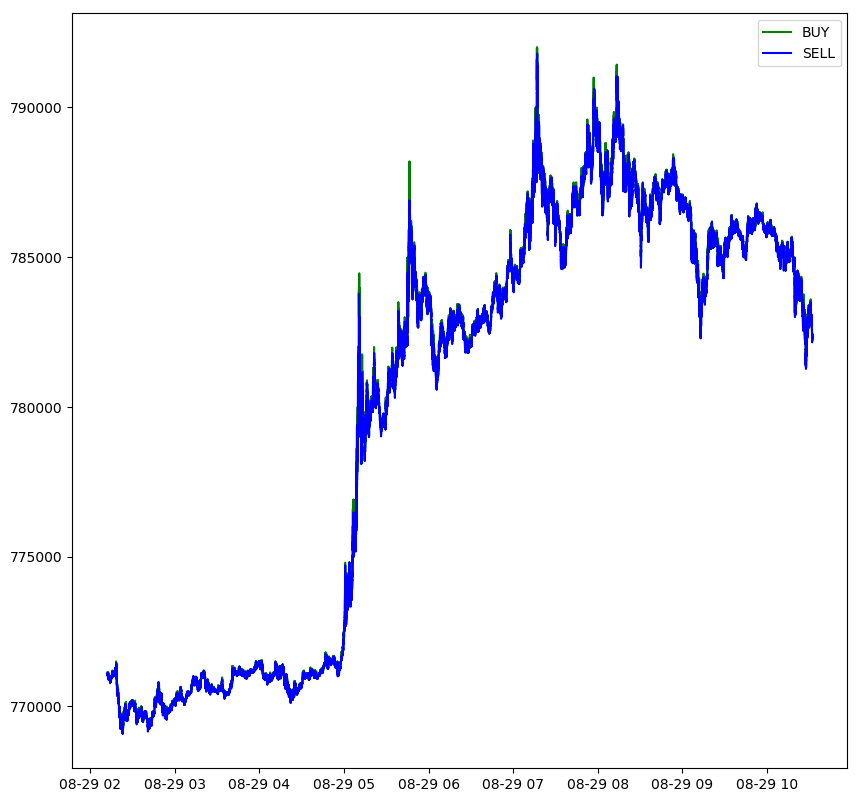

In [3]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import pybitflyer
import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('testdata082829.csv',parse_dates=['exec_date'],nrows=1000000)
df['exec_date'] = [d + datetime.timedelta(hours = 9) for d in df['exec_date'] ]

df_buy = df[df['side'] == 'BUY']
df_sell = df[df['side'] == 'SELL']

# df_buy['exec_date'] = [d + datetime.timedelta(hours = 9) for d in df_buy['exec_date'] ]
# df_sell['exec_date'] = [d + datetime.timedelta(hours = 9) for d in df_sell['exec_date'] ]

fig = plt.figure(figsize=(10,10),dpi=100)
# plt.plot(df['exec_date'],df['price'], '-',color='r',label="all")
plt.plot(df_buy['exec_date'],df_buy['price'], '-',color='g',label="BUY")
plt.plot(df_sell['exec_date'],df_sell['price'], '-',color='b',label="SELL")
plt.legend()
print('BUY:',df_buy['price'].mean())
print('SELL:',df_sell['price'].mean())
# print(df_buy['price'])
# print(df_sell['price'])
# plt.plot(df_buy['exec_date'].head(1),df_buy['price'].head(1), '-o',color='g',label="BUY")
# plt.plot(df_sell['exec_date'].head(1),df_sell['price'].head(1), '-o',color='b',label="SELL")

In [6]:
df = pd.read_csv('testdata0828.csv',parse_dates=['exec_date'],nrows=1000)
df.to_csv("testdata0828a.csv", index=False)